# task3
C(x=0) = 1

dC/dt(x=-1) = 0

compute C with implicit scheme of 1st order (something like implicit euler) and apply BCs

task: analyse stability + compare with task 1



In [41]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from task1_hickel import analytical_sol

In [42]:
#thomas algorithm
def TDMAsolve(A, b):
    Ac = A.copy()
    bc = b.copy()
    n = A.shape[0]
    x = numpy.zeros(n)

    #eliminate lower diagonal
    for k in range(1, n):
        m = Ac[k,k-1]/Ac[k-1,k-1]
        Ac[k,k] = Ac[k,k] - m*Ac[k-1,k]
        bc[k] = bc[k] - m*bc[k-1]
        #Ac[k,k-1] = 0 #not necessary

    #reverse substitution
    x[n-1] = bc[n-1]/Ac[n-1,n-1]
    k=n-2
    for i in range(0, n-1):
        x[k] = (bc[k]-Ac[k,k+1]*x[k+1])/Ac[k,k]
        k=k-1

    return x


#fill discretisation matrix
def fill_matrix(matrix):
    for i in range(len(matrix[0])):
        matrix[i,i] = 1+2*S*D
    for i in range(len(matrix[0])-1):
        matrix[i+1,i] = -S*D
    for i in range(len(matrix[0])-1):
        matrix[i,i+1] = -S*D


#apply BC to concentration vector
def apply_BC(C_vector):
    C_vector[0] = dirichlet
    C_vector[-1] = C_vector[-2]

    #C_vector[0] = C_vector[0] + S*D*dirichlet
    #C_vector[-1] = C_vector[-1] + S*D*(2*dx*neuman + C_0[-2])

    #C_vector[-1] = C_vector[-1] + S*D*(2*dx*neuman + C_vector[-2])
    #C_vector[-1] = C_vector[-2] #+ S*D*C_vector[-2]
    
    return C_vector

In [63]:
#settings of time and space
xmax = 20
tmax = 5000
dx = 1/xmax
dt = 40
D = 10**(-6)
dirichlet = 1 #at x=0
neuman = 0 #at x=h

#initialization
space = np.linspace(0,xmax,xmax)
time = np.linspace(0,tmax,tmax)
S = dt/(dx*dx)
C = [] #concentration values
A = numpy.zeros([xmax,xmax]) #discretisation matrix
C_0 = numpy.zeros([xmax]) #concentration vector at given time step

#solve
fill_matrix(A)
#C_0 = apply_BC(C_0)
C_old = C_0
for i in range(tmax):
    #C_old = apply_BC(C_old)
    C_new = TDMAsolve(A,C_old)
    C_new = apply_BC(C_new)

    C.append(C_new)
    C_old = C_new

C = np.array(C)
#df = pd.DataFrame(C)
#df.to_csv("task3_numeric.csv",index=False)
np.savetxt('task3_numeric.txt', C)

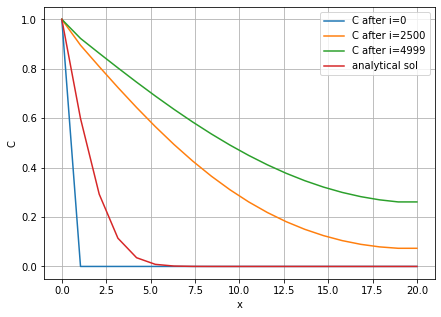

In [65]:
plottimesteps = [0,round((tmax-1)*0.01),round((tmax-1)*0.1),round((tmax-1)*0.5),tmax-1]
plottimesteps = [0,round((tmax-1)*0.5),tmax-1]

C_analytic = []
for i in range(tmax):
    C_analytic.append(analytical_sol(i, points=xmax, n_max=1000))
C_analytic = numpy.array(C_analytic)
#dfa = pd.DataFrame(C_analytic)
#df.to_csv("task3_analytic.csv",index=False)
np.savetxt('task3_analytic.txt', C_analytic)

fig = plt.figure(figsize = (7,5))
for i in plottimesteps:
    #plt.plot(space,C[i,:],label="C")
    plt.plot(space,C[i,:],label="C after i="+str(i))
plt.plot(space,analytical_sol(tmax, points=xmax, n_max=1000),label="analytical sol")

plt.legend()
plt.xlabel("x")
plt.ylabel("C")
plt.grid()
plt.show()
#plt.savefig('plots/asdfasdfasdfasdf.pdf')

In [45]:
#test TDMAsolve
A = numpy.array([[1,2,0],
                 [4,5,6],
                 [0,8,9]],dtype=numpy.float32)
b = numpy.array([[1],
                 [2],
                 [8]],dtype=numpy.float32)

M = numpy.array([[1,2,0,0],
                 [4,5,6,0],
                 [0,8,9,0],
                 [0,0,4,6]],dtype=numpy.float32)
v = numpy.array([[1],
                 [2],
                 [8],
                 [8]],dtype=numpy.float32)

#print(numpy.linalg.solve(M,v))
#print(TDMAsolve(M,v))